# Projeto Ciência de Dados - Previsão de Preços

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

![title](tabelas.png)

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
Preco,1.000000,0.293137,0.041266,0.113385,0.578353,0.557621,-0.036476
TipoBarco,0.293137,1.000000,0.142893,-0.130147,0.541307,0.567662,0.083989
TipoVenda,0.041266,0.142893,1.000000,-0.195147,0.148886,0.163431,0.054972
Ano,0.113385,-0.130147,-0.195147,1.000000,-0.211120,-0.105949,-0.440310
Comprimento,0.578353,0.541307,0.148886,-0.211120,1.000000,0.874952,0.123300
Largura,0.557621,0.567662,0.163431,-0.105949,0.874952,1.000000,0.084715
Material,-0.036476,0.083989,0.054972,-0.440310,0.123300,0.084715,1.000000


Preco          1.000000
TipoBarco      0.293137
TipoVenda      0.041266
Ano            0.113385
Comprimento    0.578353
Largura        0.557621
Material      -0.036476
Name: Preco, dtype: float64

,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


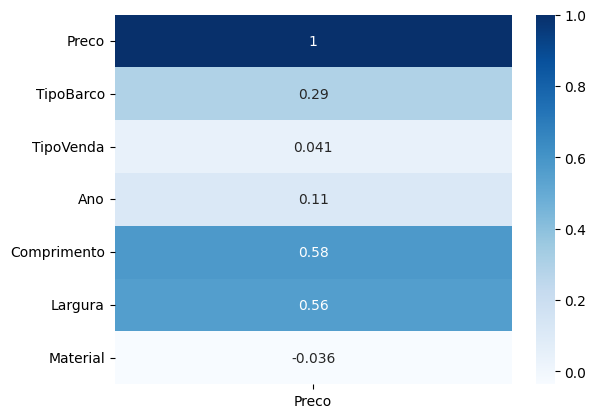

0.44084037230740425
0.8036329425935016


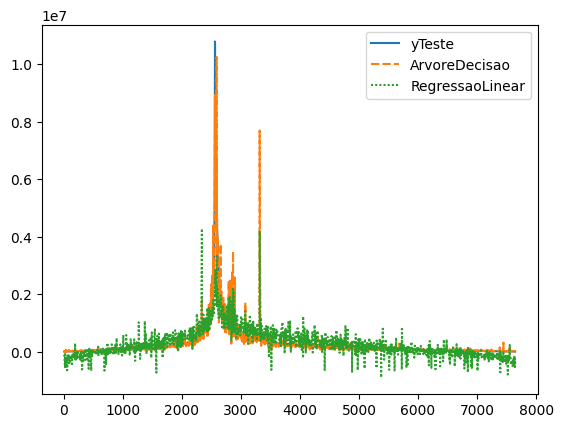

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 7544.67  8902.46 17918.  ]


In [4]:
# Passo a Passo de um Projeto de Ciência de Dados

# Passo 1: Entendimento do Desafio

# Passo 2: Entendimento da Área/Empresa
    # Prever o preço de um barco baseado nas caracteristicas dele: ano, material, usado/novo, etc.

# Passo 3: Extração/Obtenção de Dados

import pandas as pd

tabela=pd.read_csv('barcos_ref.csv')
display(tabela)

# Passo 4: Ajuste de Dados (Tratamento/Limpeza)

print(tabela.info())

# Base ja está tratada:
"""
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Preco        7649 non-null   int64
 1   TipoBarco    7649 non-null   int64
 2   TipoVenda    7649 non-null   int64
 3   Ano          7649 non-null   int64
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None
"""

# Passo 5: Análise Exploratória

# Correlaçao entre as informacoes da base de dados:
display(tabela.corr()) # correlacao representa uma certa proporcionalidade entre o crescimento de dois itens, nesse caso vamos analisar a variacao do preco em relacao as outras colunas da tabela (valor entre 0 e 1, valores negativos representam crescimento em direcoes opostas entre os valores)

display(tabela.corr()['Preco']) # isolando a tabela preco
display(tabela.corr()[['Preco']]) # melhorando a formatacao da coluna

correlacao=tabela.corr()[['Preco']]

import seaborn as sns
import matplotlib.pyplot as plt

# cria o grafico
sns.heatmap(correlacao, cmap='Blues', annot=True) # cria com o seaborn, usando o color map (cmap) de Blues para ficar com tons de azul

# exibe o grafico
plt.show() # exibe com o matplotlib


# Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
    # dividir a tabela entre  x e y  (sendo normalmente y o objetivo e x o resto da tabela)

y=tabela['Preco'] # dados que queremos prever

# x caracteristicas do barco que iremos usar para prever o preco
x=tabela.drop('Preco', axis=1) # a tabela x seriam todas as tabelas exceto a tabela preco, sendo assim o comando seria apague 'Preco' que eh uma coluna (axis=1), retorna a tabela sem a coluna 'Preco'
# axis = 0 -> Linhas, axis=1 -> colunas

# train test split (divisao em treino e teste)

from sklearn.model_selection import train_test_split

# NORMALMENTE a biblioteca divide 70% da base em treino e 30% da base em teste, em geral quanto maior a base de treino e testes melhor sera a precisao e qualidade da IA
xTreino,xTeste,yTreino,yTeste=train_test_split(x,y)

# podemos definir o tamanho da base de teste dentro da funcao caso seja assim desejado:

# xTreino,xTeste,yTreino,yTeste=train_test_split(x,y, teste_size=0.2) # nesse caso seria 20% da base para teste

# xTreino,xTeste,yTreino,yTeste=train_test_split(x,y, teste_size=0.2, random_state=1) # random_state=1 impede que o fator aleatorio seja impedido de rodar mais do que uma vez, manter o resultado inicial


# Importar a Inteligencia Artificial
# RegressaoLinear e ArvoreDeDecisao
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Cria a Inteligencia Artificial
modeloRegressaoLinear=LinearRegression()
modeloArvoreDecisao=RandomForestRegressor()

# Treinar a Inteligencia Artificial
modeloRegressaoLinear.fit(xTreino,yTreino)
modeloArvoreDecisao.fit(xTreino,yTreino)



# Passo 7: Interpretação de Resultados

# Escolher o melhor modelo -> R²
from sklearn.metrics import r2_score

previsaoRegressaoLinear=modeloRegressaoLinear.predict(xTeste)
previsaoArvoreDecisao=modeloArvoreDecisao.predict(xTeste)

print(r2_score(yTeste,previsaoRegressaoLinear)) # 0.4388968724908827 -> valor aleatorio
print(r2_score(yTeste,previsaoArvoreDecisao)) # 0.8465406348439206 -> valor aleatorio


# Visualizar as previsoes

tabelaAuxiliar=pd.DataFrame()
tabelaAuxiliar['yTeste']=yTeste
tabelaAuxiliar['ArvoreDecisao']=previsaoArvoreDecisao
tabelaAuxiliar['RegressaoLinear']=previsaoRegressaoLinear

sns.lineplot(data=tabelaAuxiliar)
plt.show()


# Fazer novas previsoes (usando a IA na prática)

tabelaNova=pd.read_csv('novos_barcos.csv')
display(tabelaNova)

previsao=modeloArvoreDecisao.predict(tabelaNova)
print(previsao)